# Figures for Question 1

This notebook contains codes used to generate the figure for Question 1, Homework 1.

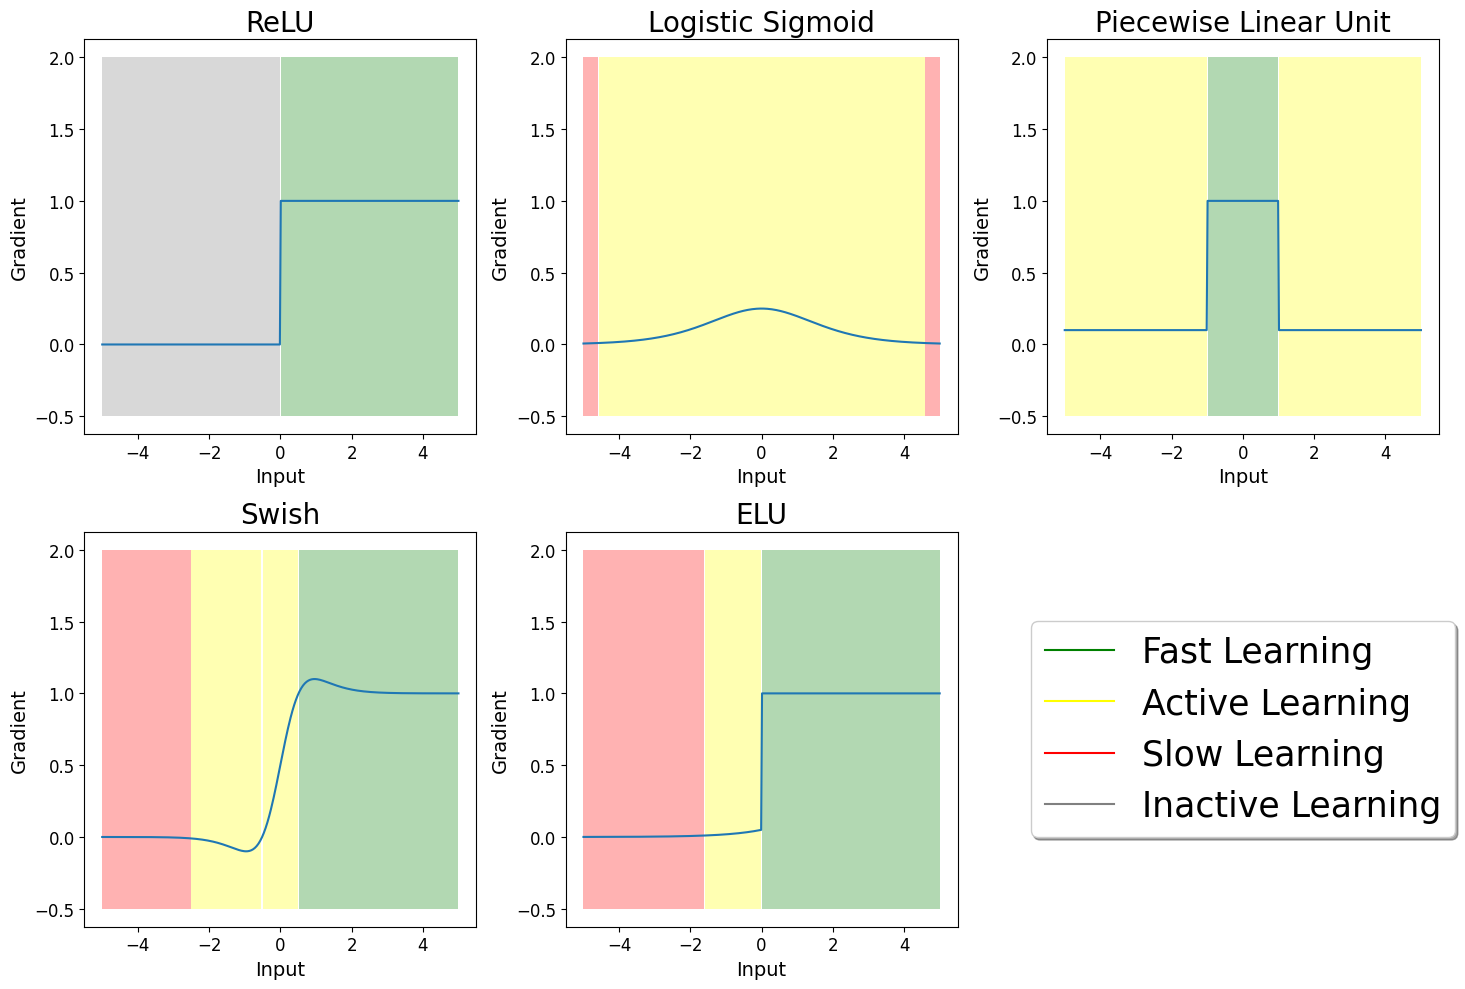

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sp


# Define the gradients that we want to plot, calculated beforehand

def relu_grad(x: np.ndarray) -> np.ndarray:
    return np.where(x >= 0, 1, 0)

def logistic_sigmoid_grad(x: np.ndarray) -> np.ndarray:
    return sp.expit(x) * (1 - sp.expit(x))

def piecewise_linear_unit_grad(x: np.ndarray) -> np.ndarray:
    return np.where((-1<=x) & (x<=1), 1, 0.1)

def swish_grad(x: np.ndarray) -> np.ndarray:
    return (1+np.exp(-2.5*x)+2.5*x*np.exp(-2.5*x))/(1+np.exp(-2.5*x))**2

def ELU_grad(x: np.ndarray) -> np.ndarray:
    return np.where(x >= 0, 1, 0.05*np.exp(x))

# Plotting

function_list = [relu_grad, logistic_sigmoid_grad, piecewise_linear_unit_grad, swish_grad, ELU_grad]
function_names = ["ReLU", "Logistic Sigmoid", "Piecewise Linear Unit", "Swish", "ELU"]

x = np.linspace(-5, 5, 400)
plt.figure(figsize=(15,10))

for i in range(len(function_list)):
    plt.subplot(2,3,i+1)
    plt.plot(x, function_list[i](x))
    plt.title(function_names[i], fontsize=20)
    # Fast Learning
    plt.fill_between(x, 2, -0.5, where=(np.abs(function_list[i](x))>0.99), facecolor='green', alpha=0.3)
    # Active learning
    plt.fill_between(x, 2, -0.5, where=(np.abs(function_list[i](x))>=0.01) & (np.abs(function_list[i](x))<=0.99), facecolor='yellow', alpha=0.3)
    # Slow learning
    plt.fill_between(x, 2, -0.5, where=(np.abs(function_list[i](x))<0.01)& (np.abs(function_list[i](x))>0), facecolor='red', alpha=0.3)
    # Inactive learning
    plt.fill_between(x, 2, -0.5, where=(function_list[i](x)==0), facecolor='gray', alpha=0.3)

    plt.xlabel("Input", fontsize=14)
    plt.ylabel("Gradient", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
# Put the legend
plt.subplot(2,3,6)
plt.plot([], [], color='green', label='Fast Learning')
plt.plot([], [], color='yellow', label='Active Learning')
plt.plot([], [], color='red', label='Slow Learning')
plt.plot([], [], color='gray', label='Inactive Learning')
plt.axis('off')
plt.legend(loc='center', bbox_to_anchor=(0.5, 0.5), fancybox=True, shadow=True, prop={'size':25})
plt.tight_layout()
plt.savefig("gradient_plot_q1.png")
plt.show()


In [ ]:
#$